## Scraping

**AZN**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving azn_related_201912202006.json to azn_related_201912202006.json


In [ ]:
from google.colab import files
df_public_azn = pd.read_json('/content/azn_related_201912202006.json', orient = 'records', lines = True)
df_public_azn.shape

(5974, 36)

**PFE**

In [ ]:
uploaded = files.upload()

Saving pfe_related_201912202006.json to pfe_related_201912202006.json


In [ ]:
df_public_pfe = pd.read_json('/content/pfe_related_201912202006.json', orient = 'records', lines = True)
df_public_pfe.shape

(13775, 36)

**biontech**

In [ ]:
uploaded = files.upload()

Saving biontech_related_201912202006.json to biontech_related_201912202006.json


In [ ]:
df_public_bio = pd.read_json('/content/biontech_related_201912202006.json', orient = 'records', lines = True)
df_public_bio.shape

(4181, 36)

**moderna**

In [ ]:
uploaded = files.upload()

Saving moderna_related_201912202006.json to moderna_related_201912202006.json


In [ ]:
df_public_mrna = pd.read_json('/content/moderna_related_201912202006.json', orient = 'records', lines = True)
df_public_mrna.shape

(31610, 36)

**J&J**

In [ ]:
uploaded = files.upload()

Saving jnj_related_201912202006.json to jnj_related_201912202006.json


In [ ]:
df_public_jnj = pd.read_json('/content/jnj_related_201912202006.json', orient = 'records', lines = True)
df_public_jnj.shape

(16954, 36)

**nvax**

In [ ]:
uploaded = files.upload()

Saving novavax_related_201912202006.json to novavax_related_201912202006.json


In [ ]:
df_public_nvax = pd.read_json('/content/biontech_related_201912202006.json', orient = 'records', lines = True)
df_public_nvax.shape

(4181, 36)

## Part I: Import packages




In [5]:
import json
import pandas as pd
import os
import datetime
from functools import reduce
from google.colab import files


## Part II: Data Scraping and Cleaning

### **Preprocess data: df_tweetcompany**

In [ ]:
uploaded_azn = files.upload()

Saving AstraZeneca.json to AstraZeneca (1).json


In [ ]:
uploaded_biontech = files.upload()

Saving biontech.json to biontech (1).json


In [ ]:
uploaded_jnj = files.upload()

Saving biontech.json to biontech (2).json


In [ ]:
uploaded_mrna = files.upload()

Saving moderna_tx.json to moderna_tx (1).json


In [ ]:
uploaded_nvax = files.upload()

Saving Novavax.json to Novavax (1).json


In [ ]:
uploaded_pfe = files.upload()

Saving Novavax.json to Novavax (2).json


In [ ]:
json_companytweets_files = ["AstraZeneca.json", "biontech.json", "JNJNews.json", "moderna_tx.json", "Novavax.json", "pfizer.json"]

In [ ]:
def read_file_yx(n):
  dir_path = '/content/' + n
  # print(dir_path)
  df = pd.read_json(dir_path, orient = 'records', lines = True)
  return df

In [ ]:
def process_file_yx(df, dropped_cols, company_name):
  
  # Drop duplicates
  df = df.drop_duplicates(subset = ['id'])
  
  # Selected required columns
  df = df.drop(columns = dropped_cols)

  # Select language as English & Drop this column
  df = df[df['language'] == 'en']
  df = df.drop(columns = ['language'])
  df = df.reset_index(drop = True)

  # Process date
  # print("check before: ", sum([0 if i.weekday() <= 4 else 1 for i in df['date']]))
  df['date'] = df['date'].apply(lambda x: x + datetime.timedelta(days=-1) if x.weekday() == 5 else x + datetime.timedelta(days = -2) if x.weekday() == 6 else x)

  # print("check after: ", sum([0 if i.weekday() <= 4 else 1 for i in df['date']]))
  df['date'] = df['date'].apply(lambda x: datetime.datetime.strftime(x, '%Y%m%d'))

  # Proprocess urls
  df['linked_url'] = df['urls'].apply(lambda x: 1 if x else 0)
  df = df.drop(columns=['urls'])

  # Preprocess retweet
  df['retweet'] = df['retweet'].apply(lambda x: 1 if x else 0)

  # Preprocess photos
  df['with_photo'] = df['photos'].apply(lambda x: 1 if x else 0)
  df = df.drop(columns=['photos'])

  # Preprocess Format
  df['replies_count'] = df['replies_count'].astype('int64')
  df['retweets_count'] = df['retweets_count'].astype('int64')
  df['likes_count'] = df['likes_count'].astype('int64')
  df['retweet'] = df['retweet'].astype('int64')

  # Groupby date
  new_df = [dict(zip(sub_df.columns, [sum(sub_df[x])
                                        if sub_df[x].dtype == 'int64'
                                        else sub_df[x].tolist()
                                        for x in sub_df.columns]))
              for _, sub_df in df.groupby('date')]
  new_df = pd.DataFrame(new_df)
  new_df['company_name'] = company_name
  new_df['date'] = new_df['date'].apply(lambda x:x[0])
  return new_df

In [ ]:
def gather_all_yx():
  company_lists = ["azn","biontech","jnj","moderna","novavax","pfizer"]
  json_companytweets_files = ["AstraZeneca.json", "biontech.json", "JNJNews.json", "moderna_tx.json", "Novavax.json", "pfizer.json"]
  dropped_cols = ['conversation_id', 'created_at', 'time', 'timezone', 'user_id',
                   'username', 'name', 'place', 'mentions', 'link', 'quote_url',
                   'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
                   'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 
                   'trans_dest']
  frames = []
  for i, j in zip(company_lists, json_companytweets_files):
    # print(i, j)
    df_tmp = read_file_yx(j)
    df_i = process_file_yx(df_tmp, dropped_cols, i)
    frames.append(df_i)
  res = pd.concat(frames,ignore_index=True)
  return res

In [ ]:
df_tweetcompany = gather_all_yx()
df_tweetcompany.to_csv("all_data_yx.csv")

In [ ]:
df_tweetcompany.head()

,id,date,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,retweet,video,linked_url,with_photo,company_name
0,1268279098922741763,20200603,[No form of racism is acceptable or can be tol...,8,40,157,[[]],[[]],0,1,1,1,azn
1,7611433697564786694,20200604,"[We agree the time to act is now, to secure ou...",13,201,322,"[[thegreatreset], [], [], [covid19], [lupus, e...","[[], [], [], [], [], []]",2,3,2,2,azn
2,7615654161749303303,20200605,"[For patients with chronic #kidneydisease, car...",3,33,135,"[[kidneydisease, eraedta20], [ckd, eraedta20],...","[[], [], [], [], [], []]",1,5,5,1,azn
3,2539932781445464066,20200608,[#CKD is often not diagnosed until it is advan...,4,14,52,"[[ckd, eraedta20], [covid19, eraedta20]]","[[], []]",0,2,2,0,azn
4,2540563731816763392,20200609,"[With no known cure for #CKD, it is increasing...",1,28,70,"[[ckd, eraedta20], []]","[[], []]",0,2,2,1,azn


### **Preprocess data: df_tweetpublic**

In [ ]:
uploaded_tweetpublic = files.upload()

Saving all_data.csv to all_data (1).csv


In [ ]:
df_tweetpublic = pd.read_csv('/content/all_data.csv')
df_tweetpublic.columns

Index(['id', 'date', 'tweet', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'retweet', 'video', 'linked_url', 'with_photo',
       'company_name'],
      dtype='object')

In [ ]:
df_tweetpublic['date'] = df_tweetpublic['date']

0       [
1       [
2       [
3       [
4       [
       ..
1263    [
1264    [
1265    [
1266    [
1267    [
Name: date, Length: 1268, dtype: object

In [ ]:
df_tweetpublic['company_name'].value_counts()

pfizer      220
biontech    219
novavax     219
moderna     219
jnj         218
azn         173
Name: company_name, dtype: int64

### **Preprocess data: df_stockprice**

BionTech: BNTX
Pfizer: PFE
Moderna: MRNA
Novavax: NVAX
Johnson&Johnson: JNJ
AstraZeneca: AZN


In [ ]:
pip install yahoo_fin

     |████████████████████████████████| 81kB 3.2MB/s 
     |████████████████████████████████| 92kB 4.3MB/s 
     |████████████████████████████████| 81kB 4.3MB/s 
     |████████████████████████████████| 81kB 4.1MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-cp37-none-any.whl size=6067 sha256=e2800cdb3ace444d807e106215e4305466a248c03c9bc276839a10913ea1e620
  Stored in directory: /root/.cache/pip/wheels/f1/80/5a/444ba08a550cdd241bd9baf8bae44be750efe370adb944506a
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=287a89b153d383fe4eaeb5a60a65cffd20d70041cb180149542919ced556793d
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for parse: filename=parse-1.19.0-cp37-none-any.whl size=24581 sha256=1f1eb6f0325e28d21d1b1908ed1b86a934c34b35d13fccadf736e1723cb52281
  Stored in directory: /root/.cache/pip/wheels/c0/39/ea/e2fd678bd130953f5438470b8dfa529f00787e9b

In [ ]:
from yahoo_fin.stock_info import get_data
ticker_list = ["bntx","pfe","mrna","nvax","jnj","azn"]
historical_datas = {}
for ticker in ticker_list:
  historical_datas[ticker] = get_data(ticker, start_date="12/01/2019", end_date="04/01/2021", index_as_date = True, interval="1d")

In [ ]:
import pandas as pd
df_stock = []
for ticker in ticker_list:
  df_tmp = pd.DataFrame(data = historical_datas[ticker])
  df_stock.append(df_tmp)
df_stockprice = pd.concat(df_stock)
df_stockprice

,open,high,low,close,adjclose,volume,ticker
2019-12-02,22.660000,23.129999,21.090000,21.870001,21.870001,106500,BNTX
2019-12-03,22.049999,23.150000,20.719999,20.770000,20.770000,88400,BNTX
2019-12-04,21.490000,22.959999,21.049999,21.370001,21.370001,146500,BNTX
2019-12-05,21.750000,22.670000,21.350000,22.490000,22.490000,129900,BNTX
2019-12-06,22.850000,24.469999,22.660000,24.370001,24.370001,251500,BNTX
...,...,...,...,...,...,...,...
2021-03-25,48.930000,49.790001,48.810001,49.700001,49.700001,6800200,AZN
2021-03-26,49.560001,50.669998,49.480000,50.639999,50.639999,9705800,AZN
2021-03-29,50.549999,51.060001,50.480000,50.810001,50.810001,8652400,AZN
2021-03-30,50.139999,50.169998,49.689999,49.970001,49.970001,7084800,AZN


In [ ]:
def preprocess_stockpricedata(df_stockprice):
  import datetime
  df_stockprice = df_stockprice.reset_index()

  # rename the column
  df_stockprice = df_stockprice.rename(columns = {"index": "date"})
  company_ticker_name = {"JNJ":"jnj", "BNTX":"biontech", "PFE":"pfizer", 
                       "NVAX":"novavax", "AZN":"azn", "MRNA":"moderna"}
  df_stockprice['company_name'] = [company_ticker_name[df_stockprice['ticker'][i]] for i in range(len(df_stockprice['ticker']))]
  
  # format the date
  df_stockprice['date'] = df_stockprice['date'].apply(lambda x: datetime.datetime.strftime(x, '%Y%m%d'))
  df_stockprice = df_stockprice.drop(columns = ['ticker'])

  # create the target variable 
  df_stockprice['target_variation'] = (df_stockprice['close'] - df_stockprice['open'])/df_stockprice['close']
  return df_stockprice


In [ ]:
df_stockprice = preprocess_stockpricedata(df_stockprice)
df_stockprice.head()

,date,open,high,low,close,adjclose,volume,company_name,target_variation
0,20191202,22.660000,23.129999,21.090000,21.870001,21.870001,106500,biontech,-0.036122
1,20191203,22.049999,23.150000,20.719999,20.770000,20.770000,88400,biontech,-0.061627
2,20191204,21.490000,22.959999,21.049999,21.370001,21.370001,146500,biontech,-0.005615
3,20191205,21.750000,22.670000,21.350000,22.490000,22.490000,129900,biontech,0.032904
4,20191206,22.850000,24.469999,22.660000,24.370001,24.370001,251500,biontech,0.062372


In [ ]:
df_stockprice.to_csv("stockprice_201912202006.csv")

In [ ]:
df_stockprice['company_name'].value_counts()

moderna     335
azn         335
pfizer      335
biontech    335
jnj         335
novavax     335
Name: company_name, dtype: int64

In [ ]:
df_tweetcompany.to_csv("tweetcompany.csv")
df_stockprice.to_csv("stockprice.csv")
df_tweetpublic.to_csv("tweetpublic.csv")

### **Preprocess data: df_stockprice_12012019**

BionTech: BNTX
Pfizer: PFE
Moderna: MRNA
Novavax: NVAX
Johnson&Johnson: JNJ
AstraZeneca: AZN


In [ ]:
from yahoo_fin.stock_info import get_data
ticker_list = ["bntx","pfe","mrna","nvax","jnj","azn"]
historical_datas = {}
for ticker in ticker_list:
  historical_datas[ticker] = get_data(ticker, start_date="12/01/2019", end_date="04/01/2021", index_as_date = True, interval="1d")

In [ ]:
import pandas as pd
df_stock = []
for ticker in ticker_list:
  df_tmp = pd.DataFrame(data = historical_datas[ticker])
  df_stock.append(df_tmp)
df_stockprice19 = pd.concat(df_stock)
df_stockprice19

,open,high,low,close,adjclose,volume,ticker
2019-12-02,22.660000,23.129999,21.090000,21.870001,21.870001,106500,BNTX
2019-12-03,22.049999,23.150000,20.719999,20.770000,20.770000,88400,BNTX
2019-12-04,21.490000,22.959999,21.049999,21.370001,21.370001,146500,BNTX
2019-12-05,21.750000,22.670000,21.350000,22.490000,22.490000,129900,BNTX
2019-12-06,22.850000,24.469999,22.660000,24.370001,24.370001,251500,BNTX
...,...,...,...,...,...,...,...
2021-03-25,48.930000,49.790001,48.810001,49.700001,49.700001,6800200,AZN
2021-03-26,49.560001,50.669998,49.480000,50.639999,50.639999,9705800,AZN
2021-03-29,50.549999,51.060001,50.480000,50.810001,50.810001,8652400,AZN
2021-03-30,50.139999,50.169998,49.689999,49.970001,49.970001,7084800,AZN


In [ ]:
def preprocess_stockpricedata(df_stockprice):
  df_stockprice = df_stockprice.reset_index()

  # rename the column
  df_stockprice = df_stockprice.rename(columns = {"index": "date"})
  company_ticker_name = {"JNJ":"jnj", "BNTX":"biontech", "PFE":"pfizer", 
                       "NVAX":"novavax", "AZN":"azn", "MRNA":"moderna"}
  df_stockprice['company_name'] = [company_ticker_name[df_stockprice['ticker'][i]] for i in range(len(df_stockprice['ticker']))]
  
  # format the date
  df_stockprice['date'] = df_stockprice['date'].apply(lambda x: datetime.datetime.strftime(x, '%Y%m%d'))
  df_stockprice = df_stockprice.drop(columns = ['ticker'])

  # create the target variable 
  df_stockprice['target_variation'] = (df_stockprice['close'] - df_stockprice['open'])/df_stockprice['close']
  return df_stockprice


In [ ]:
df_stockprice19 = preprocess_stockpricedata(df_stockprice19)
df_stockprice19.head()

,date,open,high,low,close,adjclose,volume,company_name,target_variation
0,20191202,22.660000,23.129999,21.090000,21.870001,21.870001,106500,biontech,-0.036122
1,20191203,22.049999,23.150000,20.719999,20.770000,20.770000,88400,biontech,-0.061627
2,20191204,21.490000,22.959999,21.049999,21.370001,21.370001,146500,biontech,-0.005615
3,20191205,21.750000,22.670000,21.350000,22.490000,22.490000,129900,biontech,0.032904
4,20191206,22.850000,24.469999,22.660000,24.370001,24.370001,251500,biontech,0.062372


In [ ]:
df_stockprice19.to_csv("stockprice2019.csv")

 **Load the combined dataset**

In [ ]:
uploaded_company = files.upload()

Saving related_price.csv to related_price.csv


In [ ]:
uploaded_public = files.upload()

Saving public_price.csv to public_price.csv


In [ ]:
import ast
df_ps = pd.read_csv('/content/public_price.csv')

0       ['(5 of 6) TechSvcs: +1.30%; 17 of 25 Up (&gt;...
1       ['BioNTech shares are trading lower. Not seein...
2       ['$AZN $BNTX $JNJ NEW ARTICLE : Report: Trump ...
3       ['@PeterKolchinsky @UniofOxford @VasNarasimhan...
4       ['Report: Trump Administration Picks 5 Coronav...
                              ...                        
1266    ['1.@nexteraenergy ,2.@crescolabs &amp; 3.@Ast...
1267    ['Japan vaccine czar Kono says inoculation pac...
1268    ['$AZN.PLC Stop bashing AstraZeneca — it’s onl...
1269    ['#Astrazeneca is a major supplier of #COVIDva...
1270                                                  NaN
Name: tweet, Length: 1271, dtype: object

In [ ]:
df_cs = pd.read_csv('/content/related_price.csv')
df_cs.shape

(1266, 20)

In [ ]:
df_ps[]]

,Unnamed: 0,id,date,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,retweet,video,linked_url,with_photo,company_name
0,0,130272870609759248495,"['20200731', '20200731', '20200731', '20200731...",['A group of Indian billionaires are producing...,24,43,151,"[[], ['stocks'], ['stocks'], ['stocks'], ['sto...","[['azn', 'azn'], ['pfe', 'jnj', 'azn', 'mrna',...",0,23,78,23,azn
1,1,141933969911380803724,"['20200803', '20200803', '20200803', '20200803...","[""Hey guys! Did you know $MRNA has been spendi...",26,52,125,"[['stockmarket', 'stocks', 'investing'], ['nas...","[['mrna', 'pfe', 'jnj', 'azn'], ['rds', 'bp', ...",0,16,73,15,azn
2,2,89057140733107466380,"['20200804', '20200804', '20200804', '20200804...",['Create watchlist to track major constituents...,20,35,62,"[['nasdaq'], ['sorrento', 'testkit', 'novavax'...","[['rds', 'bp', 'azn'], ['srne', 'mrna', 'pfe',...",0,11,45,11,azn
3,3,89080816230111740005,"['20200805', '20200805', '20200805', '20200805...","['Currently, the focus in conversations about ...",24,69,144,"[['coronavirus', 'vaccine', 'covid19'], ['coro...","[['atos', 'nvax', 'mrna', 'azn', 'jnj'], ['ato...",0,12,40,12,azn
4,4,95564381002507088017,"['20200806', '20200806', '20200806', '20200806...",['The Value Guys! are back with three poorly r...,10,35,58,"[[], ['nasdaq'], [], [], [], ['oralvaccine', '...","[['azn', 'kodk', 'linc'], ['rds', 'bp', 'azn']...",0,12,55,12,azn


## Baseline: Loading

In [6]:
import pickle
import numpy as np

In [7]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
uploaded = files.upload()

In [8]:
uploaded = files.upload()

Saving baseline_model_data.pkl to baseline_model_data.pkl


FileNotFoundError: ignored

In [9]:
d = load_obj('/content/baseline_model_data')
x_train, x_test, y_train, y_test = [np.array(d[x]) for x in ['x_train', 'x_test', 'y_train', 'y_test']]

In [13]:
num_training, seq_length, num_features = x_train.shape

In [16]:
x_train.shape

(1507, 20, 106)

## Baseline Model: LSTM

In [14]:
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from keras.losses import mean_squared_error
from keras.layers import Dense, LSTM, SimpleRNN, GRU
from tensorflow.keras import activations
from tensorflow import keras

In [17]:
def baseline_model_lstm():
  model = Sequential()
  model.add(LSTM(units = 50, return_sequences = False, input_shape = (x_train.shape[1], x_train.shape[2])))
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Complile the model 
  opt = keras.optimizers.Adam(1e-5) 
  model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['mean_absolute_error'])
  return model 
  
# Fit the model
model_lstm = baseline_model_lstm() 

Batch_Size = 32
steps_per_epoch = num_training // Batch_Size

history_lstm = model_lstm.fit(x_train, y_train, validation_data = (x_test, y_test), steps_per_epoch=steps_per_epoch, epochs = 50, 
                              batch_size = Batch_Size, verbose = 1)

Epoch 1/50
47/47 [==============================] - 3s 24ms/step - loss: 0.4476 - mean_absolute_error: 0.6648 - val_loss: 0.4461 - val_mean_absolute_error: 0.6639
Epoch 2/50
47/47 [==============================] - 1s 12ms/step - loss: 0.4470 - mean_absolute_error: 0.6649 - val_loss: 0.4410 - val_mean_absolute_error: 0.6600
Epoch 3/50
47/47 [==============================] - 1s 12ms/step - loss: 0.4386 - mean_absolute_error: 0.6584 - val_loss: 0.4358 - val_mean_absolute_error: 0.6561
Epoch 4/50
47/47 [==============================] - 1s 13ms/step - loss: 0.4392 - mean_absolute_error: 0.6594 - val_loss: 0.4303 - val_mean_absolute_error: 0.6519
Epoch 5/50
47/47 [==============================] - 1s 13ms/step - loss: 0.4240 - mean_absolute_error: 0.6466 - val_loss: 0.4245 - val_mean_absolute_error: 0.6474
Epoch 6/50
47/47 [==============================] - 1s 13ms/step - loss: 0.4229 - mean_absolute_error: 0.6459 - val_loss: 0.4181 - val_mean_absolute_error: 0.6424
Epoch 7/50
47/47 [====

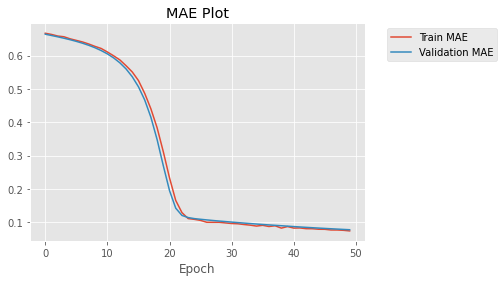

In [18]:
import matplotlib.pyplot as plt
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(history_lstm.history["mean_absolute_error"], label="Train MAE")
plt.plot( history_lstm.history["val_mean_absolute_error"], label="Validation MAE")

plt.title("MAE Plot")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

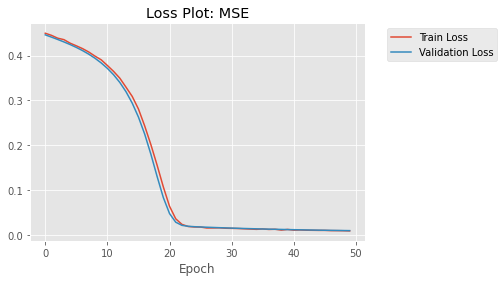

In [19]:
import matplotlib.pyplot as plt
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(history_lstm.history["loss"], label="Train Loss")
plt.plot(history_lstm.history["val_loss"], label="Validation Loss")

plt.title("Loss Plot: MSE")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

## Baseline Model: SimpleRNN


In [20]:
def baseline_model_simplernn():
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = False))
  model.add(Dense(1))

  # Complile the model
  opt = keras.optimizers.Adam(1e-4) 
  model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['mean_absolute_error'])
  return model

# Fit the model 
model_simplernn = baseline_model_simplernn()
history_simplernn = model_simplernn.fit(x_train, y_train, validation_data = (x_test, y_test), steps_per_epoch=steps_per_epoch, 
                                        epochs = 50, batch_size = Batch_Size, verbose = 1)

Epoch 1/50
47/47 [==============================] - 2s 10ms/step - loss: 0.4467 - mean_absolute_error: 0.6536 - val_loss: 0.1989 - val_mean_absolute_error: 0.4286
Epoch 2/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1272 - mean_absolute_error: 0.3237 - val_loss: 0.0159 - val_mean_absolute_error: 0.0988
Epoch 3/50
47/47 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0857 - val_loss: 0.0106 - val_mean_absolute_error: 0.0762
Epoch 4/50
47/47 [==============================] - 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0757 - val_loss: 0.0092 - val_mean_absolute_error: 0.0695
Epoch 5/50
47/47 [==============================] - 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0707 - val_loss: 0.0082 - val_mean_absolute_error: 0.0645
Epoch 6/50
47/47 [==============================] - 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0661 - val_loss: 0.0076 - val_mean_absolute_error: 0.0611
Epoch 7/50
47/47 [=========

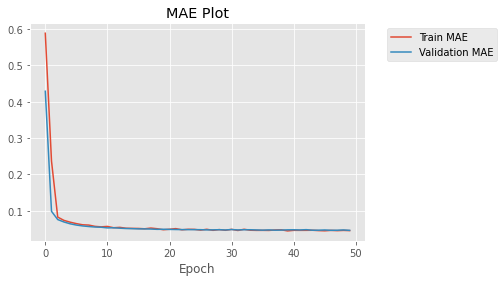

In [21]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(history_simplernn.history["mean_absolute_error"], label="Train MAE")
plt.plot( history_simplernn.history["val_mean_absolute_error"], label="Validation MAE")

plt.title("MAE Plot")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

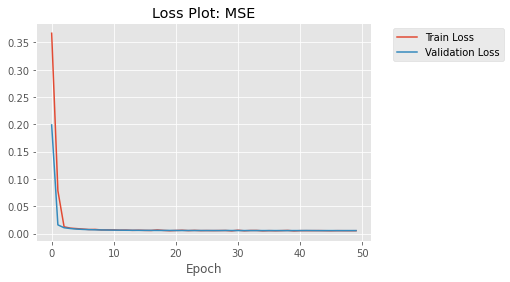

In [22]:
import matplotlib.pyplot as plt
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(history_simplernn.history["loss"], label="Train Loss")
plt.plot(history_simplernn.history["val_loss"], label="Validation Loss")

plt.title("Loss Plot: MSE")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

## Baseline Model: GRU

In [23]:
def baseline_model_GRU():
  model = Sequential()
  model.add(GRU(units = 50, return_sequences = False, input_shape = (x_train.shape[1], x_train.shape[2]), activation = 'tanh'))
  model.add(Dense(1))

  # Complile the model 
  opt = keras.optimizers.SGD(1e-4) 
  model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['mean_absolute_error'])
  return model 

# Fit the model
model_gru = baseline_model_GRU()
history_gru = model_gru.fit(x_train, y_train, validation_data = (x_test, y_test), steps_per_epoch=steps_per_epoch, epochs = 50, 
                              batch_size = Batch_Size, verbose = 1)

Epoch 1/50
47/47 [==============================] - 3s 21ms/step - loss: 0.3594 - mean_absolute_error: 0.5934 - val_loss: 0.3403 - val_mean_absolute_error: 0.5764
Epoch 2/50
47/47 [==============================] - 1s 13ms/step - loss: 0.3315 - mean_absolute_error: 0.5693 - val_loss: 0.3130 - val_mean_absolute_error: 0.5523
Epoch 3/50
47/47 [==============================] - 1s 13ms/step - loss: 0.3027 - mean_absolute_error: 0.5433 - val_loss: 0.2881 - val_mean_absolute_error: 0.5293
Epoch 4/50
47/47 [==============================] - 1s 13ms/step - loss: 0.2806 - mean_absolute_error: 0.5231 - val_loss: 0.2651 - val_mean_absolute_error: 0.5072
Epoch 5/50
47/47 [==============================] - 1s 13ms/step - loss: 0.2582 - mean_absolute_error: 0.5011 - val_loss: 0.2439 - val_mean_absolute_error: 0.4860
Epoch 6/50
47/47 [==============================] - 1s 12ms/step - loss: 0.2377 - mean_absolute_error: 0.4816 - val_loss: 0.2245 - val_mean_absolute_error: 0.4656
Epoch 7/50
47/47 [====

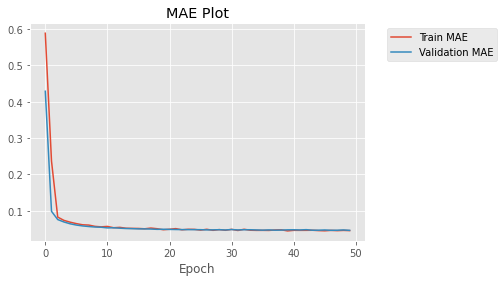

In [24]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(history_simplernn.history["mean_absolute_error"], label="Train MAE")
plt.plot( history_simplernn.history["val_mean_absolute_error"], label="Validation MAE")

plt.title("MAE Plot")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

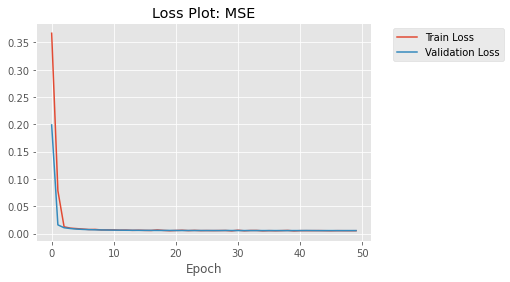

In [25]:
import matplotlib.pyplot as plt
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(history_simplernn.history["loss"], label="Train Loss")
plt.plot(history_simplernn.history["val_loss"], label="Validation Loss")

plt.title("Loss Plot: MSE")
plt.xlabel("Epoch")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')